In [1]:
import requests
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen
import logging

In [2]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

# Set up ChromeDriver
options = Options()
options.add_argument('--headless')  # Set to False to see the browser window during scraping
driver = webdriver.Chrome(options=options)

# Navigate to the videos page
url = "https://www.youtube.com/@PW-Foundation/videos"
pw_url = driver.get(url)

In [3]:
html_content = driver.page_source
soup = BeautifulSoup(html_content, 'html.parser')

In [4]:
d = soup.find_all('a',{"class" , "yt-simple-endpoint inline-block style-scope ytd-thumbnail"})

In [6]:
del d[0]

In [8]:
links = []
for i in range(5):
    links.append('https://www.youtube.com' + d[i]['href'])
    reviews = []
def details(l):
    for i in l:
        response = requests.get(i)
        soup = bs(response.text, "html.parser")
        title = soup.find("meta", itemprop="name")['content']
        views = soup.find("meta", itemprop="interactionCount")['content']
        date = soup.find("meta", itemprop="uploadDate")['content']
        thumb = soup.find("link", itemprop="thumbnailUrl")['href']
        review = {'Title': title, 'Url':i, 'Date Posted': date, 'Views': views, 'Thumbnail Url':thumb}
        reviews.append(review)
details(links)

In [9]:
reviews

[{'Title': 'आपको Commerce में क्या सीखने को मिलता है ?? Complete Information',
  'Url': 'https://www.youtube.com/watch?v=WObRrneLVRY',
  'Date Posted': '2023-02-27',
  'Views': '3767',
  'Thumbnail Url': 'https://i.ytimg.com/vi/WObRrneLVRY/maxresdefault.jpg'},
 {'Title': 'How to Attempt English Board Exam ????',
  'Url': 'https://www.youtube.com/watch?v=nX5ONgCdLcc',
  'Date Posted': '2023-02-23',
  'Views': '180529',
  'Thumbnail Url': 'https://i.ytimg.com/vi/nX5ONgCdLcc/maxresdefault.jpg'},
 {'Title': 'Best technique to attempt SST paper in Board exam || Class 10th',
  'Url': 'https://www.youtube.com/watch?v=AM2Dt7cNebw',
  'Date Posted': '2023-02-22',
  'Views': '57057',
  'Thumbnail Url': 'https://i.ytimg.com/vi/AM2Dt7cNebw/maxresdefault.jpg'},
 {'Title': 'Last Minute Strategy To Score More Than 98% || ICSE Boards || Class-10th',
  'Url': 'https://www.youtube.com/watch?v=7nMJVhey9TM',
  'Date Posted': '2023-02-21',
  'Views': '23203',
  'Thumbnail Url': 'https://i.ytimg.com/vi/7nMJ

In [20]:
titles = []
links = []
date = []
views =[]
thumb = []
for i in reviews:
    titles.append(i['Title'])
    links.append(i['Url'])
    date.append(i['Date Posted'])
    views.append(i['Views'])
    thumb.append(i['Thumbnail Url'])

In [22]:
import csv

with open("Youtube_Scraped_2.csv", mode="w", newline="") as file:

    writer = csv.writer(file)

    # Write the header row
    writer.writerow(["Video Title", "Url", "Date Posted", "Views", 'Thumbnail link'])

    # Write each data row
    for i in range(len(titles)):
        writer.writerow([titles[i], links[i], date[i],views[i],thumb[i]])

API is created using Flask and following are screenshots.

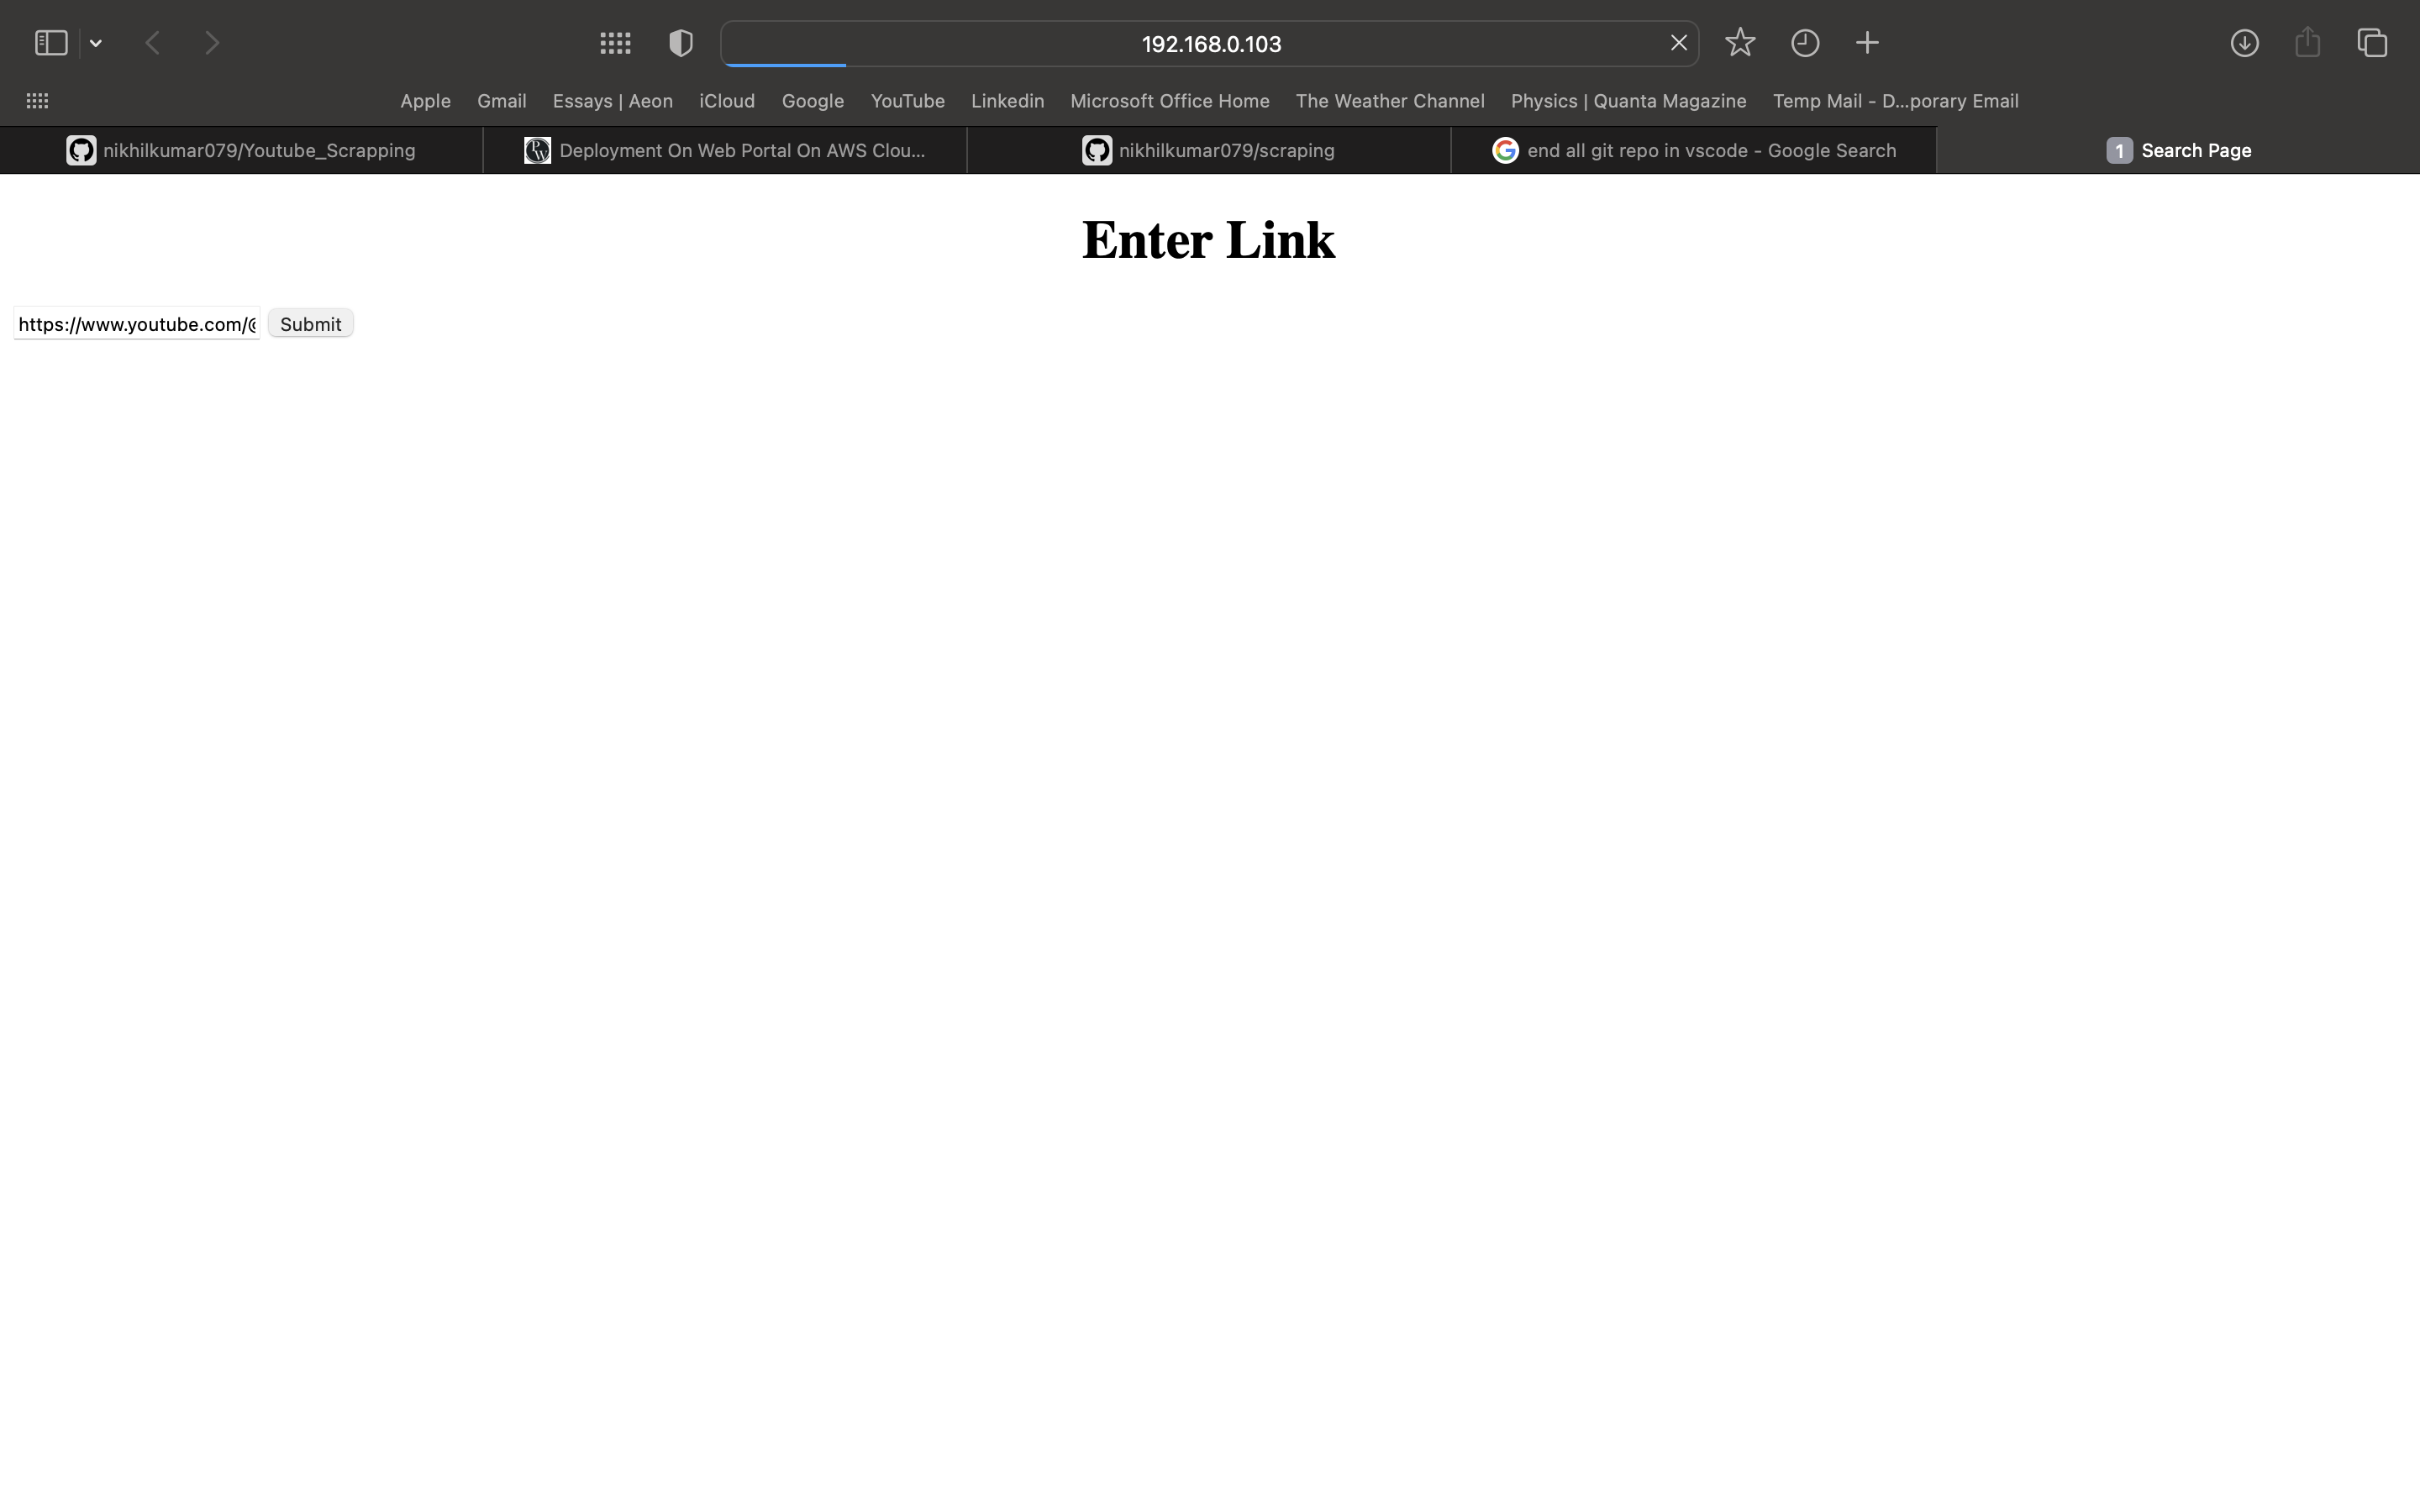

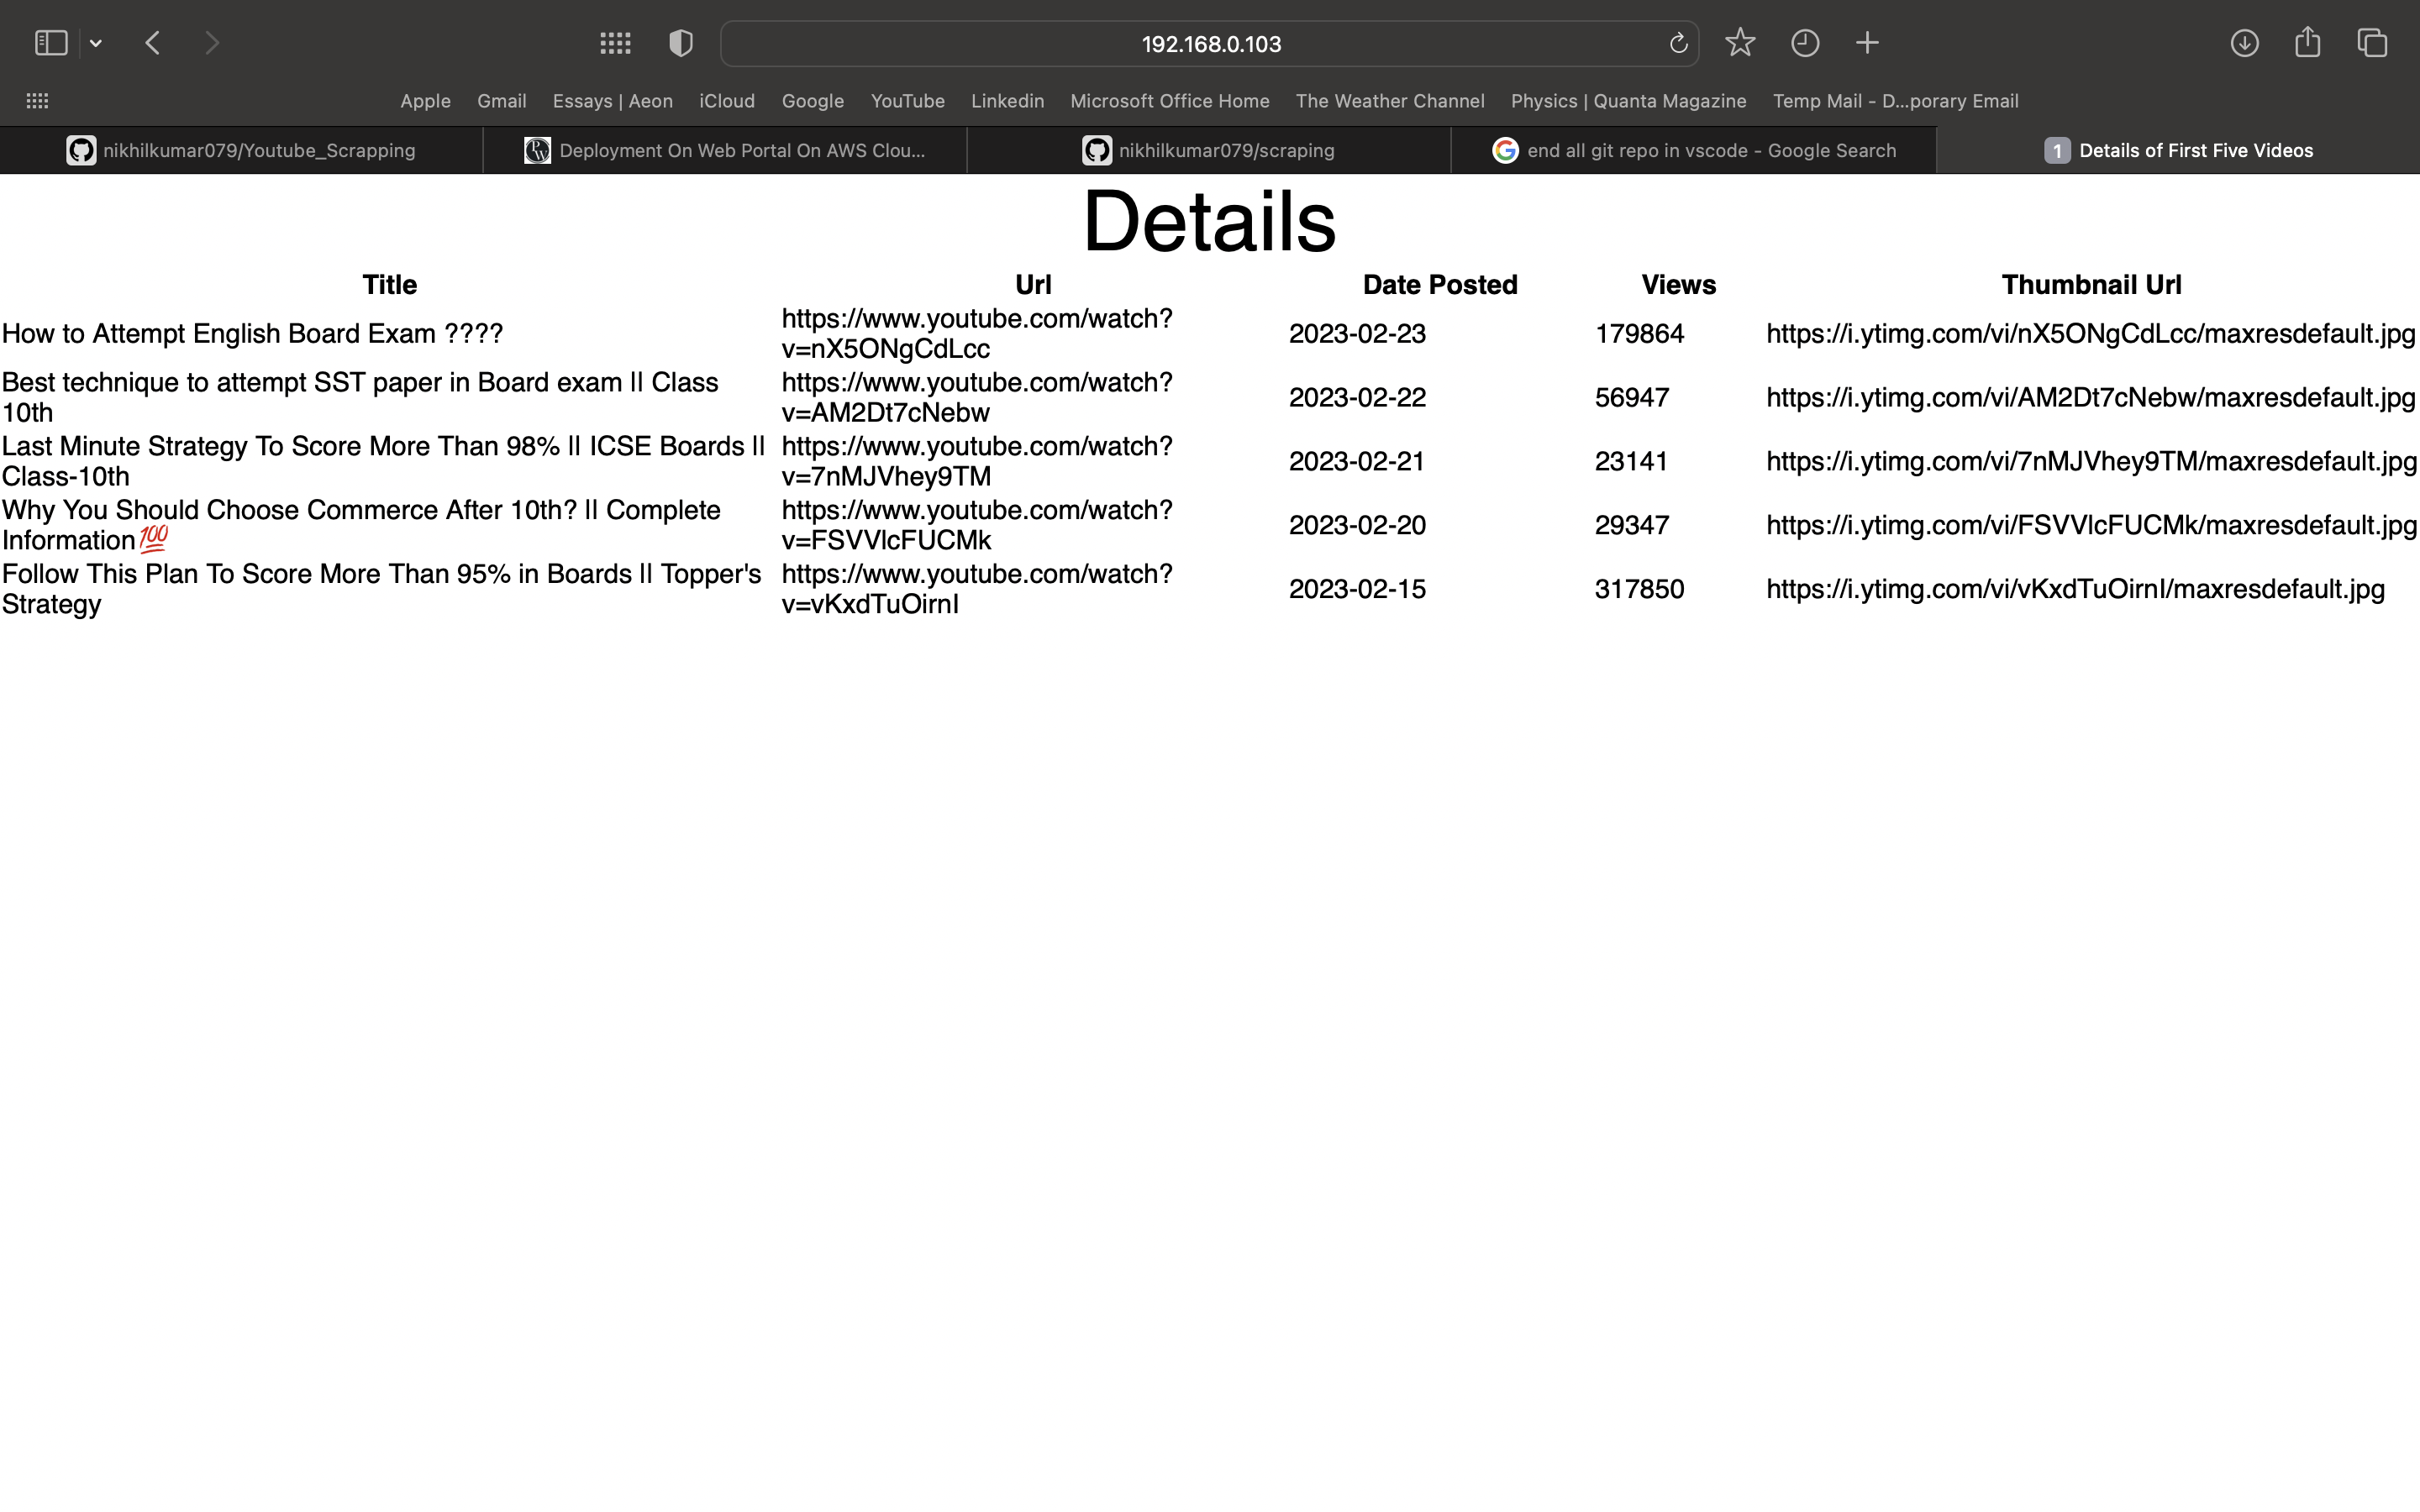